### Importing libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

### Loading the training data

In [2]:
X = np.load('../features.npy')
y = np.load('../labels.npy')

### Train-Test Split

In [4]:
# shuffle the data?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

np.save('../Models/X_train', X_train)
np.save('../Models/X_test', X_test)
np.save('../Models/y_train', y_train)
np.save('../Models/y_test', y_test)

# Do not use the testing data until the very end

In [5]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(3184, 51)
(796, 51)
(3184,)
(796,)


In [6]:
def root_mean_squared(act_y, pred_y):
    """ Root Mean Squared Error """
    rmse = np.sqrt(mean_squared_error(act_y, pred_y))
    return rmse

def mean_squared(act_y, pred_y):
    """ Mean Squared Error """
    mse = mean_squared_error(act_y, pred_y)
    return mse

def absolute_error(act_y, pred_y):
    """ Mean Absolute Error"""
    mae = mean_absolute_error(act_y, pred_y)
    return mae

In [7]:
rmse_score_function = make_scorer(root_mean_squared, greater_is_better=False)
mse_score_function = make_scorer(mean_squared, greater_is_better=False)
mae_score_function = make_scorer(absolute_error, greater_is_better=False)

###  Cross Validation with Linear Regression

In [8]:
kf = KFold(n_splits=10)

In [9]:
mse_average = []
rmse_average = []
mae_average = []
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    Y_train_cv, Y_test_cv = y_train[train_index], y_train[test_index]
    
    print(X_train.shape)
    print(X_test.shape)
    linearRegression = LinearRegression()
    
    linearRegression.fit(X_train_cv, Y_train_cv)
    
    pred = linearRegression.predict(X_test_cv)
    
    
    rmse = root_mean_squared(Y_test_cv, pred)
    mse = mean_squared(Y_test_cv, pred)
    mae = absolute_error(Y_test_cv, pred)
    
    mse_average.append(mse)
    rmse_average.append(rmse)
    mae_average.append(mae)
#     print "RMSE: {0}, MSE: {1}".format(rmse, mse)

print "Average RMSE: {0}, Average MSE: {1}, Average MAE: {2}".format(np.mean(rmse_average), np.mean(mse_average), np.mean(mae_average))

(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
(3184, 51)
(796, 51)
Average RMSE: 4.6700985396, Average MSE: 21.8542705369, Average MAE: 3.62563942996


In [10]:
cv_linear_regression = pd.DataFrame({
        "CV Iteration": range(1, 11),
        "MAE": mae_average,
        "RMSE": rmse_average
    })

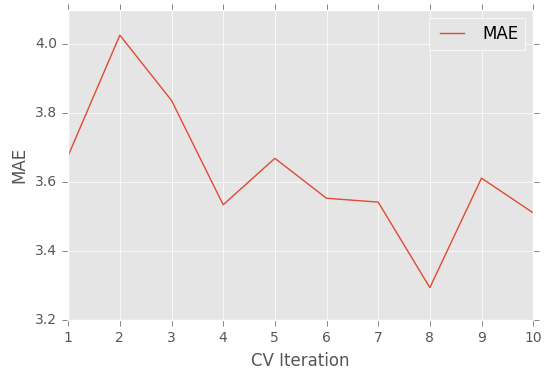

In [12]:
fig, ax = plt.subplots()

cv_linear_regression.plot.line(x="CV Iteration", y="MAE", ax=ax)
ax.set_ylabel("MAE")

In [13]:
baseline_linreg_model = LinearRegression()
baseline_linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
baseline_linreg_model.coef_

array([ -4.77094578e-02,  -1.28755334e-02,  -5.67584970e-03,
        -2.80255642e-01,  -2.88154152e+00,  -1.01594588e+00,
        -1.70173806e+01,  -1.39061123e+00,   2.21457992e+00,
        -5.51643414e-02,   8.30039650e-01,   1.81783730e+00,
         2.14735333e+00,   8.82775497e+00,  -2.11440407e+00,
         9.35406249e-01,   3.50346842e-01,   9.44493389e-01,
         3.55440249e-01,  -2.88701297e-02,   5.32982863e-01,
         2.28410326e+00,   1.39402025e+00,   1.91106114e+00,
        -6.18240680e-02,   8.51545510e-01,  -2.29611646e+00,
        -5.30961223e-02,  -1.43030191e-01,  -9.43277157e-01,
         1.28378583e+00,  -1.03623842e+00,  -1.16157885e+00,
         1.36073076e+00,   1.27331544e+00,  -1.21179228e+00,
        -1.03325865e+00,   1.78387242e-01,  -6.69471602e-01,
         2.45402322e-03,   2.09416623e+00,  -3.55403127e+00,
         1.98273346e-02,  -6.01385987e-01,   2.02468301e+00,
        -9.91192889e-01,  -1.35859494e+00,  -6.07164586e-01,
         2.67751698e-01,

In [15]:
df_data = pd.read_csv("../clean_dataset.csv")

In [16]:
feature_names = df_data.columns

In [17]:
import operator
sorted_feature_weights= sorted(dict(zip(list(feature_names), list(baseline_linreg_model.coef_))).items(), key=operator.itemgetter(1), reverse=True)

In [18]:
sorted_feature_weights[:10]

[('effective_field_goal_percentage', 8.8277549746641224),
 ('steals_per_game', 2.2841032562694581),
 ('3-point_field_goal_attempted_per_game', 2.2145799220849058),
 ('2-point_field_goal_percentage', 2.1473533280702441),
 ('total_rebound_percentage', 2.0941662288676666),
 ('win_shares', 2.0246830105599298),
 ('turnovers_per_game', 1.9110611434300062),
 ('2-point_field_goals_attempted_per_game', 1.8178372958488045),
 ('blocks_per_game', 1.3940202487733582),
 ('free_throw_attempt_rate', 1.3607307609258983)]